roc_auc for class 1: 0.9895755071374907
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       726
           1       1.00      0.84      0.91       110

    accuracy                           0.98       836
   macro avg       0.99      0.92      0.95       836
weighted avg       0.98      0.98      0.98       836

          Predicted 0  Predicted 1
Actual 0          726            0
Actual 1           18           92


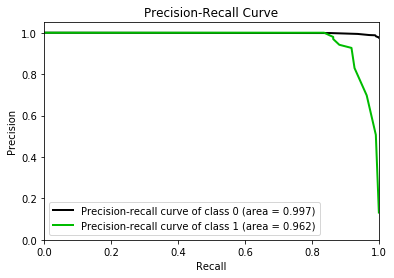

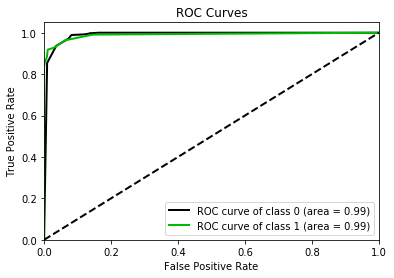

In [2]:
# Import packages
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import scikitplot
import nltk
# nltk.download('wordnet')
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_auc_score

np.random.seed(1)

# # ====================================== Load the data =============================================================
# data = pd.read_csv('spam.csv', usecols = [0,1], encoding='latin-1')
# data.columns = ['label', 'text']

# # ========================= Customized normalization of text developed by Kenneth ===================================
# total_stopwords = set([word.replace("'",'') for word in stopwords.words('english')])
# lemma = WordNetLemmatizer()
# def preprocess_text(text):
#     text = text.lower() # Convert to lowercase
#     text = text.replace("'",'') #
#     text = re.sub('[^a-zA-Z]',' ',text)
#     words = text.split()
#     words = [lemma.lemmatize(word) for word in words if (word not in total_stopwords) and (len(word)>1)] # Remove stop words
#     text = " ".join(words)
#     return text

# data['text'] = data['text'].apply(preprocess_text)

# # ========================= features and labels definition ==========================================================
# vectorizer = CountVectorizer()
# x = vectorizer.fit_transform(data['text']).toarray()

# le = LabelEncoder()
# y = le.fit_transform(data['label'])

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, shuffle = False)

# # ========================= Random Forest classier starts ===========================================================
# classifier = RandomForestClassifier(n_estimators=15,criterion='entropy')
# classifier.fit(x_train,y_train)
# y_pred_rt = classifier.fit(x_train, y_train).predict_proba(x_test)
# y_pred = classifier.predict(x_test)

# # ========================= precision_recall_curve plotting =========================================================
# pr, rc, thresholds = precision_recall_curve(y_test, y_pred_rt[:, 1])
# print("roc_auc for class 1:", roc_auc_score(y_test,y_pred_rt[:, 1]))
# # Figure 1: precision, recall vs thresholds

# scikitplot.metrics.plot_precision_recall(y_test, y_pred_rt, plot_micro = False)
# crossover_index = np.max(np.where(pr <= rc))
# crossover_cutoff = thresholds[crossover_index]
# crossover_recall = rc[crossover_index]

# # Figure 2: ROC
# scikitplot.metrics.plot_roc(y_test, y_pred_rt, plot_micro = False, plot_macro = False)


# ========================== classification report and Confusion matrix ============================================
print(classification_report(y_test, y_pred > crossover_cutoff))

m_confusion_test = confusion_matrix(y_test, y_pred > crossover_cutoff)
print(pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1']))


# ==================================================================================================================
plt.show()

In [3]:
# ====================================== Load the data =============================================================
data = pd.read_csv('spam.csv', usecols = [0,1], encoding='latin-1')
data.columns = ['label', 'text']
data.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [7]:
# ========================= Customized normalization of text developed by Kenneth ===================================
total_stopwords = set([word.replace("'",'') for word in stopwords.words('english')])
lemma = WordNetLemmatizer()
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = text.replace("'",'') #
    text = re.sub('[^a-zA-Z]',' ',text)
    words = text.split()
    words = [lemma.lemmatize(word) for word in words if (word not in total_stopwords) and (len(word)>1)] # Remove stop words
    text = " ".join(words)
    return text

data['text'] = data['text'].apply(preprocess_text)
data.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4468                               sorry ill call later   30
spam    747    577  private account statement show un redeemed poi...    9

In [8]:
# ========================= features and labels definition ==========================================================
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data['text']).toarray()

le = LabelEncoder()
y = le.fit_transform(data['label'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, shuffle = False)

In [10]:
# ========================= Random Forest classier starts ===========================================================
classifier = RandomForestClassifier(n_estimators=15,criterion='entropy')
classifier.fit(x_train,y_train)
y_pred_rt = classifier.fit(x_train, y_train).predict_proba(x_test)
y_pred = classifier.predict(x_test)
np.count_nonzero(y_pred)

94

roc_auc for class 1: 0.9796957175056349


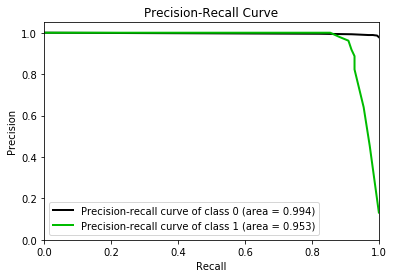

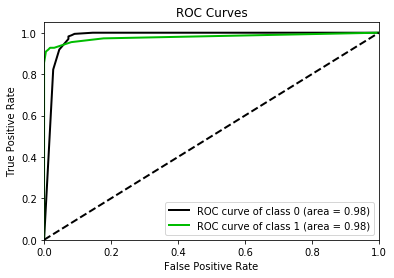

In [11]:
# ========================= precision_recall_curve plotting =========================================================
pr, rc, thresholds = precision_recall_curve(y_test, y_pred_rt[:, 1])
print("roc_auc for class 1:", roc_auc_score(y_test,y_pred_rt[:, 1]))
# Figure 1: precision, recall vs thresholds

scikitplot.metrics.plot_precision_recall(y_test, y_pred_rt, plot_micro = False)
crossover_index = np.max(np.where(pr <= rc))
crossover_cutoff = thresholds[crossover_index]
crossover_recall = rc[crossover_index]

# Figure 2: ROC
scikitplot.metrics.plot_roc(y_test, y_pred_rt, plot_micro = False, plot_macro = False)
plt.show()

In [12]:
# ========================== classification report and Confusion matrix ============================================
print(classification_report(y_test, y_pred > crossover_cutoff))

m_confusion_test = confusion_matrix(y_test, y_pred > crossover_cutoff)
print(pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       726
           1       1.00      0.85      0.92       110

    accuracy                           0.98       836
   macro avg       0.99      0.93      0.96       836
weighted avg       0.98      0.98      0.98       836

          Predicted 0  Predicted 1
Actual 0          726            0
Actual 1           16           94
